# Matrix Multiplication from Foundations
The foundations are:
- Python
- matplotlib
- Python standard library
- Jupyter notebooks and nbdev

In [94]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Get Data

In [95]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data/"mnist.pkl.gz"

Tips
* Press shift + tab to see what options a method has
* Or you can just hit tab inside of the method call
* shift enter on a function without arguments to see where it comes from
* put a questionmark after it to read the docs
* put two questionmakrs after it to read the source code

In [96]:
from urllib.request import urlretrieve

In [97]:
urlretrieve

<function urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)>

In [98]:
urlretrieve?

Signature: urlretrieve(url, filename=None, reporthook=None, data=None)
Docstring:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

Returns a tuple containing the path to the newly created
data file as well as the resulting HTTPMessage object.
File:      /usr/lib/python3.11/urllib/request.py
Type:      function

In [99]:
urlretrieve??

Signature: urlretrieve(url, filename=None, reporthook=None, data=None)
Source:   
def urlretrieve(url, filename=None, reporthook=None, data=None):
    """
    Retrieve a URL into a temporary location on disk.

    Requires a URL argument. If a filename is passed, it is used as
    the temporary file location. The reporthook argument should be
    a callable that accepts a block number, a read size, and the
    total file size of the URL target. The data argument should be
    valid URL encoded data.

    If a filename is passed and the URL points to a local resource,
    the result is a copy from local file to new file.

    Returns a tuple containing the path to the newly created
    data file as well as the resulting HTTPMessage object.
    """
    url_type, path = _splittype(url)

    with contextlib.closing(urlopen(url, data)) as fp:
        headers = fp.info()

        # Just return the local path and the "headers" for file://
        # URLs. No sense in performing a copy unless r

In [100]:
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [101]:
!ls -1 data

mnist.pkl.gz


In [102]:
with gzip.open(path_gz, "rb") as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

I don't understand how you would know to destructure it like this though

- "rb" specifies that we want to read as binary
- The tuples on the left of the expression are destructuring the data

- We convert to a list since the data will be returned as numpy

In [103]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

- This is a function for breaking up a list into chunks
- We step through the list at the given chunk size
- Yield allows us to return from this list withou breaking the loop so we can return each chunk of the list in an iterable
- Iterables are things you can call next() on

In [104]:
def chunks(x, size):
    for i in range(0, len(x), size): yield x[i:i+size]

In [105]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

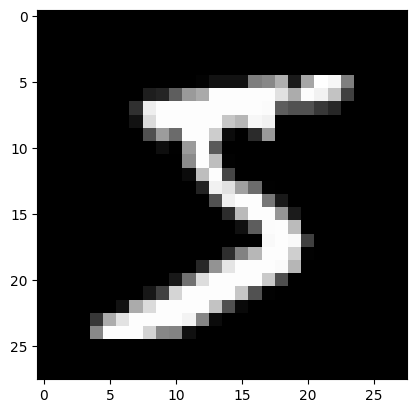

In [106]:
mpl.rcParams["image.cmap"] = "gray"
plt.imshow(list(chunks(lst1, 28)));

## Iterators
- Iterators are really important and they can often replace more complilcated pieces of software
- They can process chunks of data sequentially without storing it all in memory

In [107]:
from itertools import islice

In [108]:
it = iter(vals)
islice(it, 5)

- Can turn any list into an interator
- islice converts it into a different kind of iterator
- islice grabs the first n things from an iterable
- This is interesting becuase we can make our own version of yield

In [109]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

- iter can take a list or a callable
- a callable is generally a function x()
- the callable function will be called until the function returns the value we pass to it ( [] )
- [] will be returned when the islice is done

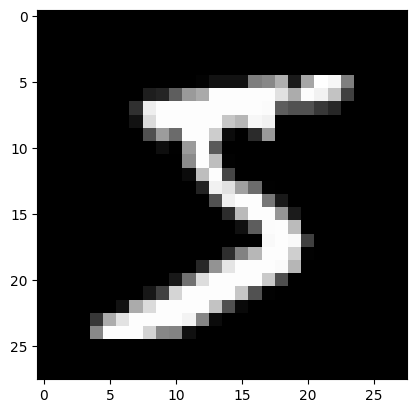

In [110]:
plt.imshow(img);

## Matrix and Tensor
- To access the values in our img list, we would have to index into them but we don't really want to do this
- Instead we will create our own matrix class so we can treat the list like a matrix

In [111]:
class Matrix:
    def __init__(self, xs):
        self.xs = xs
    def __getitem__(self, idxs):
        return self.xs[idxs[0]][idxs[1]]

- __ __ are dunder methods are the standard python object methods
- We need to define the behavior in these cases
- When we initialize the Matrix, we pass in our values which is stored as an object attribute
- We alose need a way to get things from our matrix. When we call [] on our object, python calls our __getitem__ method

In [112]:
m = Matrix(img)
m[20,15]

0.98828125

In [113]:
import torch
from torch import tensor

In [114]:
tens = tensor(img)
tens[20,15]

tensor(0.9883)

- Thus with our matrix class we have successfully implemented the basics of a tensor and we can now use the tensor object

In [115]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

- map returns an interator that applies the function we give it to every item of the iterable and yields the results
- In this case our tuple is the iterable and map will apply tensor to each list and return it which we can then save

In [116]:
imgs = x_train.reshape([-1, 28, 28])
imgs.shape

torch.Size([50000, 28, 28])

- This is the equivalent tensor method to our chunks function from before
- reshape([50000, 28, 28]) is equivalent but we don't need to specify it

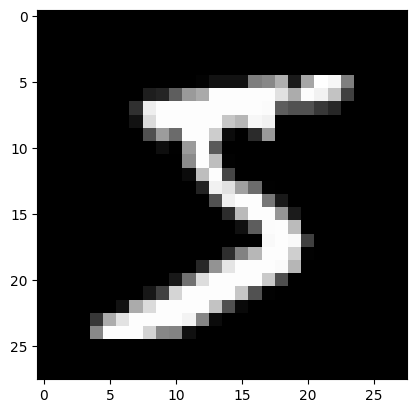

In [117]:
plt.imshow(imgs[0])

#### What is a tensor?
- Goes back to a language called APL
- Mathematical notation for defining IBM systems
- The creator of APL studied tensor analysis from physics
- He implemented the functionality of physics tensors in code
- This is good becasue we no longer have to write loops for everything, we can express them directly
- APL calls these things arrays
- Numpy calls them arrays
- PyTorch calls them tensors
- They are all the same thing
- They are rectangular blocks of numbers with any number of dimensions

##### Back to our code
- Our tensor is a rank 3 tensor (3 dimensions)

In [118]:
imgs[0].shape

torch.Size([28, 28])

In [119]:
imgs[0,20,15]

tensor(0.9883)

In [120]:
x_train.shape

torch.Size([50000, 784])

In [121]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [122]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

## Random Numbers
- We don't actually need to build a random number generator since there is on included in the standard Python library but we will anyways because it is good to know
- Computers cannot actually generate random numbers
- There is a cool website where you can use and API to get random numbers generated by quantum fluctuations in a vacuum
- CloudFlare uses a wall of lava lamps and a camera to generate random numbers
- All these things can get you random numbers but they are kind of slow

#### Sudo Random
- Instead we use a sudo random number generator
- Our sudo random number generator looks like it is returning randomly distributed numbers
- For this we want our generator to return numbers that don't appear to be correlated and are evenly distributed over the range provided

In [123]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [124]:
seed(21029384710239840)
rnd_state

(24701, 14214, 1826)

In [125]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30296
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30296 + y/30307 + z/30323) % 1.0

In [126]:
rand(), rand(), rand()

(0.3252986819280379, 0.05705734701170684, 0.3600646416501161)

In [127]:
if os.fork(): print(f"In parent: {rand()}")
else:
    print(f"In child: {rand()}")
    os._exit(os.EX_OK)

In parent: 0.9501540726215909
In child: 0.9501540726215909


In [128]:
if os.fork(): print(f"In parent: {torch.rand(1)}")
else:
    print(f"In child: {torch.rand(1)}")
    os._exit(os.EX_OK)

In parent: tensor([0.9290])
In child: tensor([0.9290])


In [129]:
from random import random

In [130]:
if os.fork(): print(f"In parent: {random()}")
else:
    print(f"In child: {random()}")
    os._exit(os.EX_OK)

In parent: 0.028080399441410053
In child: 0.00847520186225581


- Need to remember that random number generators rely on the this global rnd_state
- if we use os.fork() it will create a whole seperate copy of this python process
- If we try and create random numbers in these processes, we will get the same number since the processes are copies of one another
- This comes up in deep learning becasue we often do parallel processing
- To get truly random numbers in parallel processing, you need to initialize the random generator in each process
- PyTorch, and NumPy fail to do this but the Python standard library works

In [131]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

2.85 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [132]:
%timeit -n 10 torch.randn(784, 10)

The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
51.5 µs ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- These both do the same thing but the PyTorch version is orders of magnitude quicker so we will use the PyTorch version and not ours for training models

### Matric Multiplication
Now we need to implement the ability to multiply our matrices

In [133]:
torch.manual_seed(1)
weights = torch.rand(784,10)
bias = torch.zeros(10)

In [134]:
m1 = x_valid[:5]
m2 = weights

In [135]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [136]:
ar,ac = m1.shape
br,bc = m2.shape
(ar,ac), (br, bc)

((5, 784), (784, 10))

In [137]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [138]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i,k] * m2 [k,j]

In [139]:
t1

tensor([[46.6636, 43.0262, 48.5570, 46.9266, 44.9626, 43.0611, 36.7986, 46.3429,
         51.7943, 43.6182],
        [43.3006, 44.5781, 48.1564, 46.7842, 39.7537, 48.0385, 40.7752, 46.8513,
         50.8835, 45.7565],
        [40.5090, 40.6744, 42.5173, 40.5222, 39.4232, 40.5739, 38.8814, 41.3914,
         44.3403, 39.6398],
        [41.0770, 36.0778, 43.2215, 40.4301, 37.2713, 37.2804, 39.5606, 38.0567,
         39.6794, 36.7342],
        [55.4875, 50.5413, 49.9963, 57.0323, 49.8134, 52.8530, 53.3208, 52.9511,
         53.9894, 49.0043]])

In [140]:
t1.shape

torch.Size([5, 10])

In [141]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

In [142]:
t1

tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])

In [143]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [144]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k]*b[k,j]

In [145]:
%time _=matmul(m1, m2)

CPU times: user 403 ms, sys: 131 µs, total: 404 ms
Wall time: 403 ms


#### Numba

In [146]:
!pip install numba


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [147]:
from numba import njit
from numpy import array

In [148]:
@njit
def dot(a,b):
    res = 0
    for i in range(len(a)): res += a[i]*b[i]
    return res

In [149]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 1.35 s, sys: 50.9 ms, total: 1.4 s
Wall time: 340 ms


20.0

Numba will compile our code as machine code so the first time we run it, it will be slow but after that it will execute much more quicly.

In [150]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = dot(a[i,:], b[:,j])
    return c

In [151]:
m1a, m2a = m1.numpy(), m2.numpy()

In [152]:
from fastcore.test import *

In [153]:
%timeit -n 50 matmul(m1a, m2a)

The slowest run took 6.19 times longer than the fastest. This could mean that an intermediate result is being cached.
413 µs ± 423 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


#### Elementwise Ops

In [154]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [155]:
a + b

tensor([12., 14.,  3.])

In [156]:
(a < b).float().mean()

tensor(0.67)

In [157]:
m = tensor([[1.,2,3],[4,5,6],[7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

**Frobenius Norm**

In [158]:
sf = (m*m).sum()
sf

tensor(285.)

In [159]:
sf.sqrt()

tensor(16.88)

In [160]:
m[2:],m[:,2]

(tensor([[7., 8., 9.]]), tensor([3., 6., 9.]))

In [161]:
m[2]

tensor([7., 8., 9.])

In [162]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [163]:
%timeit -n 50 matmul(m1, m2)

619 µs ± 78.7 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [164]:
def matmul(a, b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [165]:
%timeit -n 50 matmul(m1, m2)

513 µs ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Broadcasting
The term broadcasting describes how arrays with different shapes are traed during arithmetic operations

#### Broadcasting with a scalar

In [166]:
a

tensor([10.,  6., -4.])

In [167]:
a > 0

tensor([ True,  True, False])

In [168]:
a + 1

tensor([11.,  7., -3.])

In [169]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [170]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

#### Broadcasting a vecor to a matrix

In [171]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [172]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [173]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [174]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [175]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [176]:
t = c.expand_as(m)

In [177]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [178]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [179]:
t.storage()

/tmp/ipykernel_2236/1911556638.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t.storage()


 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [180]:
t.stride(),t.shape

((0, 1), torch.Size([3, 3]))

In [181]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [182]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [183]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [184]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [185]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [186]:
m + c[:, None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [187]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

#### Broadcasting Rules

In [188]:
c[None,:]

tensor([[10., 20., 30.]])

In [189]:
c[None,:].shape

torch.Size([1, 3])

In [190]:
c[:,None], c[:,None].shape

(tensor([[10.],
         [20.],
         [30.]]),
 torch.Size([3, 1]))

In [191]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [192]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [193]:
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

In [194]:
m.shape

torch.Size([3, 3])

### Matmnul with broadcasting 

In [195]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [196]:
digit[:,None].shape

torch.Size([784, 1])

In [197]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [198]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i,:,None] * b).sum(dim=0)
    return c

In [199]:
%timeit -n 50 matmul(m1, m2)

85.4 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [200]:
%time matmul(x_train, weights)

CPU times: user 812 ms, sys: 0 ns, total: 812 ms
Wall time: 762 ms


tensor([[52.78, 50.38, 57.56,  ..., 58.73, 56.32, 51.45],
        [60.74, 57.79, 64.76,  ..., 64.31, 66.09, 56.52],
        [40.03, 39.89, 39.59,  ..., 35.88, 35.26, 37.44],
        ...,
        [46.15, 44.78, 48.35,  ..., 46.48, 50.23, 43.47],
        [43.27, 43.49, 48.87,  ..., 40.92, 46.24, 45.48],
        [51.26, 51.43, 53.72,  ..., 54.96, 56.33, 54.25]])

### Einstein summation

Einstein summaation is a compact representation for combining products and sums. Some rules:
* Repeating letters between input arrays means that values along those axes will be multipilied
* Omitting a letter from the output means the values along that axis will be summed

In [201]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [202]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum("ik,kj->ikj", m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [203]:
mr.sum(1)

tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])

In [204]:
torch.einsum("ik,kj->ij", m1, m2)

tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])

In [205]:
def matmul(a,b): return torch.einsum("ik,kj->ij", a, b)

In [206]:
%timeit -n 50 matmul(m1, m2)

41.2 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


### pytorch op

In [207]:
def matmul(a,b): return a@b

In [208]:
%timeit -n 50 matmul(m1, m2)

17 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


### CUDA
* Techniques so far have only used the CPU
* We should make use of the GPU
* GPUs like to do lots of things in parallel
* We need to tell the GPU all the things we want it to do in parallel

First we are going to write something in Python that looks like it would be in parallel but it's not so it will be slow.

In [209]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i,k] * b[k,j]
        c[i,j] = tmp

In [210]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[46.66,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00]])

* So we've calculated just one cell of our output matrix

In [211]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
        for i in range(grid_x):
            for j in range(grid_y): kernel((i,j), *args, **kwargs)

In [212]:
res = torch.zeros(ar,bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[46.66, 43.03, 48.56, 46.93, 44.96, 43.06, 36.80, 46.34, 51.79, 43.62],
        [43.30, 44.58, 48.16, 46.78, 39.75, 48.04, 40.78, 46.85, 50.88, 45.76],
        [40.51, 40.67, 42.52, 40.52, 39.42, 40.57, 38.88, 41.39, 44.34, 39.64],
        [41.08, 36.08, 43.22, 40.43, 37.27, 37.28, 39.56, 38.06, 39.68, 36.73],
        [55.49, 50.54, 50.00, 57.03, 49.81, 52.85, 53.32, 52.95, 53.99, 49.00]])

In [213]:
from numba import cuda

In [214]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [215]:
tr = x_train@weights
tr.shape

torch.Size([50000, 10])

In [216]:
r = np.zeros(tr.shape)
m1g,m2g,rg = map(cuda.to_device, (x_train,weights,r))

In [217]:
r.shape

(50000, 10)

In [218]:
# Don't need to know the details of this right now
# Just copy it when you need it
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3125, 1)

In [219]:
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()
test_close(tr, r, eps=1e-3)

In [220]:
r

array([[52.78, 50.38, 57.56, ..., 58.73, 56.32, 51.45],
       [60.74, 57.79, 64.76, ..., 64.31, 66.09, 56.52],
       [40.03, 39.89, 39.59, ..., 35.88, 35.26, 37.44],
       ...,
       [46.15, 44.78, 48.35, ..., 46.48, 50.23, 43.47],
       [43.27, 43.49, 48.87, ..., 40.92, 46.24, 45.48],
       [51.26, 51.43, 53.72, ..., 54.96, 56.33, 54.25]])

In [221]:
%%timeit -n 10
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

5.67 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [222]:
m1c,m2c = x_train.cuda(),weights.cuda()

In [223]:
r=(m1c@m2c).cpu()

In [228]:
%timeit -n 10 r=(m1c@m2c).cpu()

The slowest run took 33.09 times longer than the fastest. This could mean that an intermediate result is being cached.
3.23 ms ± 6.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


I can verify in my performance monitor that my GPU is getting spun up when I call this code but it's running really slow

* ssh tunneling to run from mac